In [1]:
import numpy as np 
import pickle
import itertools
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
train = pd.read_csv('kdd_train.csv')

In [3]:
train['labels'].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [5]:
train['protocol_type'].unique()

array(['tcp', 'udp', 'icmp'], dtype=object)

In [6]:
train.loc[train['protocol_type']=='tcp', 'protocol_type'] =1
train.loc[train['protocol_type']=='udp', 'protocol_type'] =2
train.loc[train['protocol_type']=='icmp', 'protocol_type']=3

In [7]:
train.loc[train['flag']== 'SF', 'flag'] = 1
train.loc[train['flag']== 'S0', 'flag'] = 2
train.loc[train['flag']== 'REJ', 'flag'] = 3
train.loc[train['flag']== 'RSTR', 'flag'] = 4
train.loc[train['flag']== 'SH', 'flag'] = 5
train.loc[train['flag']== 'RSTO', 'flag'] = 6
train.loc[train['flag']== 'S1', 'flag'] = 7
train.loc[train['flag']== 'RSTOS0', 'flag'] = 8
train.loc[train['flag']== 'S3', 'flag'] = 9
train.loc[train['flag']== 'S2', 'flag'] = 10
train.loc[train['flag']== 'OTH', 'flag'] = 11

In [8]:
train['flag'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype=object)

In [9]:
train['flag'] = pd.to_numeric(train['flag'])

In [10]:
train['protocol_type'] = pd.to_numeric(train['protocol_type'])

In [11]:
train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,1,ftp_data,1,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,2,other,1,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,1,private,2,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,1,http,1,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,1,http,1,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,1,private,2,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune
125969,8,2,private,1,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0,1,smtp,1,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0,1,klogin,2,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune


In [12]:
from collections import Counter

In [13]:
print('Classes and number of values in trainset',Counter(train['labels']))

Classes and number of values in trainset Counter({'normal': 67343, 'neptune': 41214, 'satan': 3633, 'ipsweep': 3599, 'portsweep': 2931, 'smurf': 2646, 'nmap': 1493, 'back': 956, 'teardrop': 892, 'warezclient': 890, 'pod': 201, 'guess_passwd': 53, 'buffer_overflow': 30, 'warezmaster': 20, 'land': 18, 'imap': 11, 'rootkit': 10, 'loadmodule': 9, 'ftp_write': 8, 'multihop': 7, 'phf': 4, 'perl': 3, 'spy': 2})


In [14]:

train.loc[train['labels']=='teardrop', 'labels'] = 'attacker'

train.loc[train['labels']=='pod', 'labels'] = 'attacker'
train.loc[train['labels']=='back', 'labels'] = 'attacker'
train.loc[train['labels']=='land', 'labels'] = 'attacker'

train.loc[train['labels']=='warezclient', 'labels'] = 'attacker'

train.loc[train['labels']=='portsweep', 'labels'] = 'attacker'
 


train.loc[train['labels']=='guess_passwd', 'labels'] = 'attacker'
train.loc[train['labels']=='ftp_write', 'labels'] = 'attacker' 
train.loc[train['labels']=='multihop', 'labels'] = 'attacker' 
train.loc[train['labels']=='rootkit', 'labels'] = 'attacker' 
train.loc[train['labels']=='buffer_overflow', 'labels'] = 'attacker' 
train.loc[train['labels']=='imap', 'labels'] = 'attacker' 
train.loc[train['labels']=='loadmodule', 'labels'] = 'attacker' 
train.loc[train['labels']=='phf', 'labels'] = 'attacker' 
train.loc[train['labels']=='spy', 'labels'] = 'attacker' 
train.loc[train['labels']=='perl', 'labels'] = 'attacker' 
train.loc[train['labels']=='warezmasterl', 'labels'] = 'attacker' 

train.loc[train['labels']=='warezmaster', 'labels'] = 'attacker' 

In [15]:
print('Classes and number of values in trainset',Counter(train['labels']))

Classes and number of values in trainset Counter({'normal': 67343, 'neptune': 41214, 'attacker': 6045, 'satan': 3633, 'ipsweep': 3599, 'smurf': 2646, 'nmap': 1493})


In [16]:
X = train[['protocol_type',
 
 'flag','src_bytes',
 'dst_bytes',
 'hot',
 'count',
 'srv_count',
 'same_srv_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_rerror_rate'
 ]]



In [17]:
y = train['labels']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
y.unique()

array(['normal', 'neptune', 'attacker', 'ipsweep', 'nmap', 'satan',
       'smurf'], dtype=object)

In [20]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=2)

In [21]:
X,y = oversample.fit_resample(X,y)
print('Classes and number of values in trainset after SMOTE:',Counter(y))

Classes and number of values in trainset after SMOTE: Counter({'normal': 67343, 'neptune': 67343, 'attacker': 67343, 'ipsweep': 67343, 'nmap': 67343, 'satan': 67343, 'smurf': 67343})


In [22]:
y.unique()

array(['normal', 'neptune', 'attacker', 'ipsweep', 'nmap', 'satan',
       'smurf'], dtype=object)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)
print(X_train.shape)
print(X_test.shape)

(329980, 14)
(141421, 14)


In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [26]:
classifier.score(X_train,y_train)

0.9942117704103279

In [27]:
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(X_test )
accuracy_score(y_pred,y_test)

0.9925965733519068

In [28]:
import sklearn.metrics

In [29]:
print(sklearn.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    attacker       1.00      1.00      1.00     20131
     ipsweep       0.98      0.97      0.98     20309
     neptune       1.00      1.00      1.00     20206
        nmap       0.97      0.99      0.98     20190
      normal       1.00      1.00      1.00     20306
       satan       1.00      1.00      1.00     20024
       smurf       1.00      1.00      1.00     20255

    accuracy                           0.99    141421
   macro avg       0.99      0.99      0.99    141421
weighted avg       0.99      0.99      0.99    141421



In [30]:
y_pred = classifier.predict(X_test )
y_true=y_test


from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true,y_pred)
cm

array([[20106,     0,     0,     0,    21,     4,     0],
       [    0, 19684,     0,   620,     4,     1,     0],
       [    2,     0, 20199,     0,     4,     1,     0],
       [    0,   291,     0, 19898,     0,     1,     0],
       [   55,     9,     6,     2, 20216,    17,     1],
       [    4,     0,     0,     0,     3, 20017,     0],
       [    1,     0,     0,     0,     0,     0, 20254]], dtype=int64)

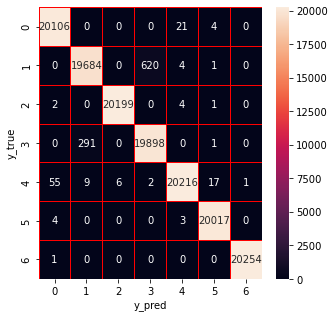

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
import pickle

pickle.dump(classifier,open('credit.pkl','wb'))
 = pickle.load(open('credit.pkl','rb'))